<a href="https://colab.research.google.com/github/33abrar/Colab-Notebooks/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Issues with Colab

1. Memory Discard Issue

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("/content/download.jpg")
plt.imshow(img)
plt.show()

1. Solution

In [ ]:
# solution: Mount your drive
from google.colab import drive
drive.mount('/content/drive')

2. Changing Directory

In [ ]:
!pwd

2. Solution

In [ ]:
# solution
% cd /content

# Start

# 1. Get the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Download Data

Copy from drive (if drive contains the file)

In [ ]:
#copy from drive
!cp /content/drive/MyDrive/Fire/housing.csv /content/housing.csv

Or Download and Extract

In [ ]:
# !wget https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz

In [ ]:
# !tar xvf /content/housing.tgz

In [ ]:
#copy to drive
#!cp /content/housing.csv /content/drive/MyDrive/Fire

## Take a Quick Look at the Data

In [ ]:
import pandas as pd

In [ ]:
housing = pd.read_csv("/content/housing.csv")

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff755531390>,
      dtype=object)

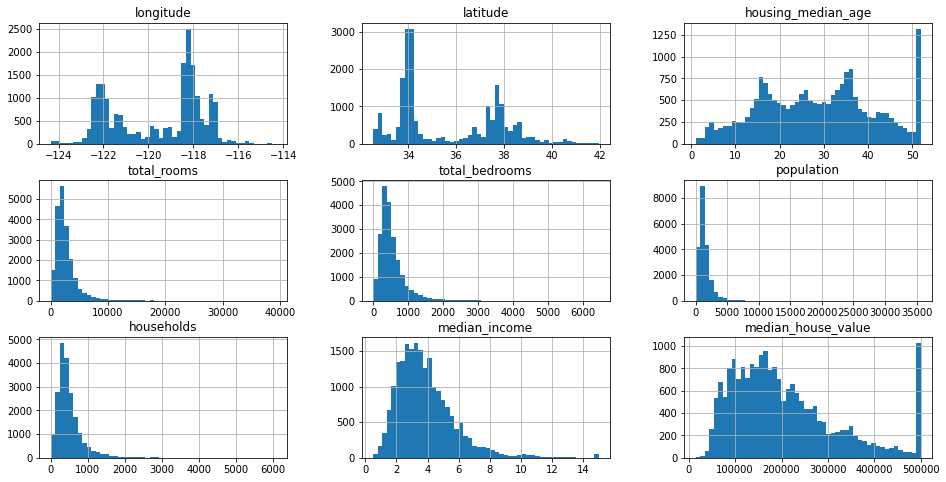

In [ ]:
housing.hist(bins = 50, figsize=(16,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff755564b50>,
      dtype=object)

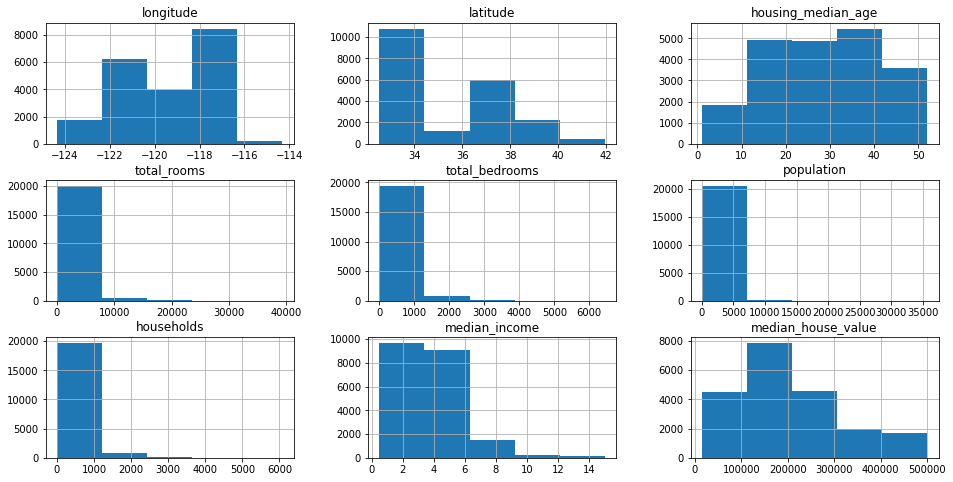

In [ ]:
housing.hist(bins = 5, figsize=(16,8))

## Create a Train Test Set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(housing, test_size = 0.2, random_state = 42)

In [ ]:
print("Train", len(train), "Test", len(test))

Train 16512 Test 4128


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

In [ ]:
housing["median_house_value_cat"] = pd.cut(housing["median_house_value"], 
                                           bins = [0, 80000, 140000, 220000, 300000, np.inf],
                                           labels = [0, 1, 2, 3, 4])

In [ ]:
housing["median_house_value"].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [ ]:
housing[["median_house_value", "median_house_value_cat"]]

,median_house_value,median_house_value_cat
0,452600.0,4
1,358500.0,4
2,352100.0,4
3,341300.0,4
4,342200.0,4
...,...,...
20635,78100.0,0
20636,77100.0,0
20637,92300.0,1
20638,84700.0,1


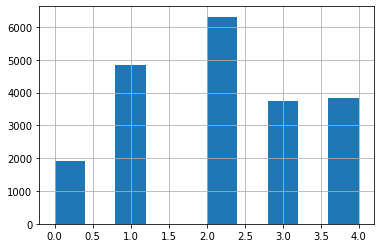

In [ ]:
housing["median_house_value_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

In [ ]:
for train_index, test_index in split.split(housing, housing["median_house_value_cat"]):
    strat_train = housing.loc[train_index]
    strat_test = housing.loc[test_index]

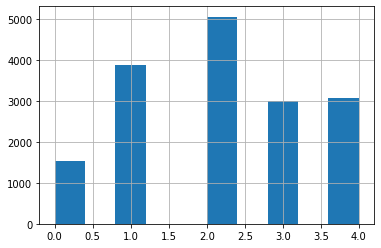

In [ ]:
strat_train["median_house_value_cat"].hist()

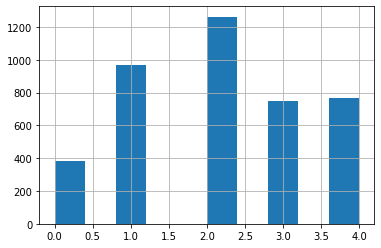

In [ ]:
strat_test["median_house_value_cat"].hist()

In [ ]:
strat_train.drop("median_house_value_cat", axis = 1, inplace=True)

In [ ]:
strat_test.drop("median_house_value_cat", axis = 1, inplace=True)

# 2. Prepare the data for Machine Learning algorithms

## Separate Attributes and Labels

In [ ]:
strat_train_attr = strat_train.drop("median_house_value", axis = 1, inplace=False)
strat_train_labels = strat_train["median_house_value"].copy()

In [ ]:
strat_train_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12930 to 12840
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16350 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


## Data Cleaning

In [ ]:
median = strat_train_attr["total_bedrooms"].median()
strat_train_attr["total_bedrooms"].fillna(median, inplace = True)

## Cat vs Num

## Handling Text and Categorical Attributes

In [ ]:
strat_train_attr["ocean_proximity"].value_counts()

<1H OCEAN     7280
INLAND        5252
NEAR OCEAN    2137
NEAR BAY      1839
ISLAND           4
Name: ocean_proximity, dtype: int64

In [ ]:
strat_train_cat = strat_train_attr[["ocean_proximity"]].copy()

In [ ]:
#from sklearn.preprocessing import OrdinalEncoder
#OE = OrdinalEncoder()
#strat_train_cat = OE.fit_transform(strat_train_cat)

In [ ]:
strat_train_cat

,ocean_proximity
12930,INLAND
14088,NEAR OCEAN
5863,<1H OCEAN
8324,<1H OCEAN
14893,NEAR OCEAN
...,...
16708,<1H OCEAN
19085,<1H OCEAN
6609,<1H OCEAN
3082,INLAND


In [ ]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()
strat_train_cat = OHE.fit_transform(strat_train_cat)

In [ ]:
strat_train_cat

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
strat_train_cat.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

## Feature Scaling

In [ ]:
strat_train_num = strat_train_attr.drop("ocean_proximity", axis = 1, inplace=False)

In [ ]:
strat_train_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.00000,16512.000000,16512.000000,16512.000000
mean,-119.575224,35.639336,28.628331,2642.051054,538.17672,1430.371911,500.506904,3.859981
std,2.007022,2.139287,12.607356,2173.788155,416.13744,1138.055644,379.382639,1.885853
min,-124.350000,32.550000,1.000000,2.000000,2.00000,5.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1453.000000,298.00000,788.000000,280.000000,2.556350
50%,-118.510000,34.260000,29.000000,2133.000000,437.00000,1172.000000,411.000000,3.530750
75%,-118.010000,37.720000,37.000000,3165.250000,646.00000,1736.250000,606.000000,4.730050
max,-114.310000,41.950000,52.000000,37937.000000,6445.00000,35682.000000,6082.000000,15.000100


In [ ]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
strat_train_num = SS.fit_transform(strat_train_num)

In [ ]:
strat_train_cat.shape

(16512, 5)

In [ ]:
strat_train_all = np.concatenate((strat_train_num, strat_train_cat.toarray()), axis = 1)

In [ ]:
strat_train_all.shape

(16512, 13)

# 3. Select a Model and Train it

## M1. [Linear Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(strat_train_all, strat_train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
strat_train_labels

12930    196000.0
14088    223000.0
5863     231200.0
8324      94000.0
14893    155900.0
           ...   
16708    346100.0
19085    306600.0
6609     163100.0
3082      67500.0
12840     81100.0
Name: median_house_value, Length: 16512, dtype: float64

In [ ]:
index = 8324      

In [ ]:
strat_train_all.shape

(16512, 13)

In [ ]:
pre = lr.predict(strat_train_all)

In [ ]:
real = strat_train_labels.iloc[index]

In [ ]:
print("Prediction: ", pre[index], "real: ", real)

Prediction:  98587.06422405227 real:  85400.0


In [ ]:
for i in range(10):
  real = strat_train_labels.iloc[i]
  print("Prediction: ", pre[i], " real: ", real, " Difference: ", np.abs(pre[i] - real))

Prediction:  195753.32047502318  real:  196000.0  Difference:  246.67952497681836
Prediction:  250588.52205759182  real:  223000.0  Difference:  27588.52205759182
Prediction:  255415.65727414057  real:  231200.0  Difference:  24215.65727414057
Prediction:  136854.681599328  real:  94000.0  Difference:  42854.681599328
Prediction:  209267.58531395238  real:  155900.0  Difference:  53367.58531395238
Prediction:  118402.48693793436  real:  69100.0  Difference:  49302.48693793436
Prediction:  247848.2480439447  real:  146700.0  Difference:  101148.24804394471
Prediction:  155519.66406169423  real:  165300.0  Difference:  9780.335938305769
Prediction:  180268.0052723293  real:  225000.0  Difference:  44731.99472767071
Prediction:  171100.21874377143  real:  146700.0  Difference:  24400.21874377143


## M2. [Decision Tree Model](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(strat_train_all, strat_train_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

## M3. [SVM Model](https://scikit-learn.org/stable/modules/svm.html#regression)

In [ ]:
from sklearn import svm

In [ ]:
svmr = svm.SVR()
svmr.fit(strat_train_all, strat_train_labels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## M4. [Naive Bayes](https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression)

In [ ]:
from sklearn.linear_model import BayesianRidge

In [ ]:
nbr = BayesianRidge()
nbr.fit(strat_train_all, strat_train_labels)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

#  4. Evaluating the model

## On Training Set

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def rmse(labels, predictions):
  mse = mean_squared_error(labels, predictions)
  rmse = np.sqrt(mse)
  print(rmse)

In [ ]:
rmse(strat_train_labels, lr.predict(strat_train_all))

68687.47425543131


In [ ]:
rmse(strat_train_labels, dtr.predict(strat_train_all))

0.0


In [ ]:
rmse(strat_train_labels, svmr.predict(strat_train_all))

118018.57913092294


In [ ]:
rmse(strat_train_labels, nbr.predict(strat_train_all))

68691.56523540278


## On Testing Set

In [ ]:
strat_test_attr = strat_test.drop("median_house_value", axis = 1, inplace=False)
strat_test_labels = strat_test["median_house_value"].copy()
strat_test_attr["total_bedrooms"].fillna(median, inplace = True) #previous media value

strat_test_cat = strat_test_attr[["ocean_proximity"]].copy()
strat_test_cat = OHE.transform(strat_test_cat) #only transform

strat_test_num = strat_test_attr.drop("ocean_proximity", axis = 1, inplace=False)
strat_test_num = SS.transform(strat_test_num) #only transform

strat_test_all = np.concatenate((strat_test_num, strat_test_cat.toarray()), axis = 1)

In [ ]:
rmse(strat_test_labels, lr.predict(strat_test_all))
rmse(strat_test_labels, dtr.predict(strat_test_all))
rmse(strat_test_labels, svmr.predict(strat_test_all))
rmse(strat_test_labels, nbr.predict(strat_test_all))

rmse(strat_test_labels, (lr.predict(strat_test_all) + dtr.predict(strat_test_all) + svmr.predict(strat_test_all) + nbr.predict(strat_test_all))/4)

68860.91718782378
67668.5823542296
119045.92020922402
68839.934102172
65742.12126084128
